In [1]:
from importlib import reload
import dataset as d; reload(d)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [2]:
df = d.load_dataset()

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Create X and Y

In [4]:
PREDICTED_COLUMNS = ['radius_mean', 'diagnosis']
FEATURES = ['mean']

In [5]:
x, y = d.create_xy(df, FEATURES, PREDICTED_COLUMNS)

In [6]:
x = d.preprocess_data(x)

## Split Train, Val & Test

In [7]:
(x_train_sup, y_train_sup), (x_train_unsup, y_train_unsup), (x_val, y_val), (x_test, y_test) = \
                                                                        d.split_train_val_test_sup_unsup(x, y, train_perc=0.6)

In [8]:
y_train_sup_bool = [True if o == 'M' else False for o in y_train_sup[:, 1]]
y_val_bool = [True if o == 'M' else False for o in y_val[:, 1]]
y_test_bool = [True if o == 'M' else False for o in y_test[:, 1]]

In [9]:
print('# Examples for training supervised methods:', len(x_train_sup))
print('# Examples for training unsupervised methods:', len(x_train_unsup))
print('# Examples for validation:', len(x_val))
print('# Examples for test:',  len(x_test))

# Examples for training supervised methods: 341
# Examples for training unsupervised methods: 218
# Examples for validation: 114
# Examples for test: 114


## Features

### PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
basis = pca.fit(x_train_sup)

In [11]:
x_train_sup = basis.transform(x_train_sup)
x_train_unsup = basis.transform(x_train_unsup)
x_val = basis.transform(x_val)
x_test = basis.transform(x_test)

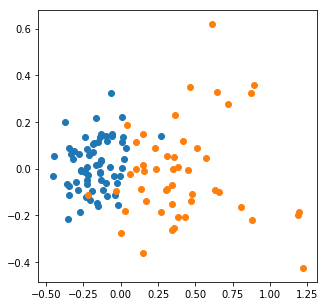

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(x_val[y_val[:, 1] == 'B', 0], x_val[y_val[:, 1] == 'B', 1])
plt.scatter(x_val[y_val[:, 1] == 'M', 0], x_val[y_val[:, 1] == 'M', 1])

## Supervised Models

In [13]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Linear Regression

In [14]:
model = LogisticRegression()
model.fit(x_train_sup, y_train_sup_bool)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_train_sup_pred = model.predict(x_train_sup)

In [16]:
print('Training Accuracy: %.1f%%' % (metrics.accuracy_score(y_train_sup_pred, y_train_sup_bool) * 100))

Training Accuracy: 93.0%


#### Validation

In [17]:
y_val_pred = model.predict(x_val)

In [18]:
print('Validation Accuracy: %.1f%%' % (metrics.accuracy_score(y_val_pred, y_val_bool) * 100))

Validation Accuracy: 93.9%


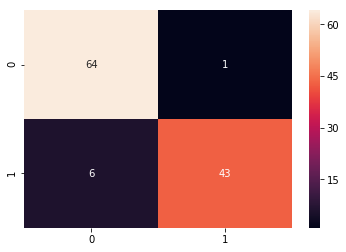

In [19]:
sns.heatmap(metrics.confusion_matrix(y_val_bool, y_val_pred), annot=True)

#### Test

In [20]:
y_test_pred = model.predict(x_test)

In [21]:
print('Test Accuracy: %.1f%%' % (metrics.accuracy_score(y_test_pred, y_test_bool) * 100))

Test Accuracy: 93.0%


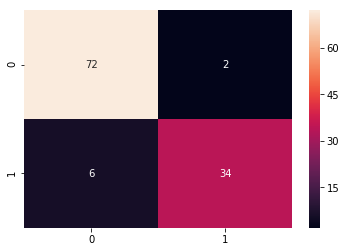

In [22]:
sns.heatmap(metrics.confusion_matrix(y_test_bool, y_test_pred), annot=True)

### Random Forest

#### Train Model

In [23]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train_sup, y_train_sup_bool)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
y_train_sup_pred = model.predict(x_train_sup)

In [25]:
print('Training Accuracy: %.1f%%' % (metrics.accuracy_score(y_train_sup_pred, y_train_sup_bool) * 100))

Training Accuracy: 99.7%


#### Validation

In [26]:
y_val_pred = model.predict(x_val)

In [27]:
print('Validation Accuracy: %.1f%%' % (metrics.accuracy_score(y_val_pred, y_val_bool) * 100))

Validation Accuracy: 93.9%


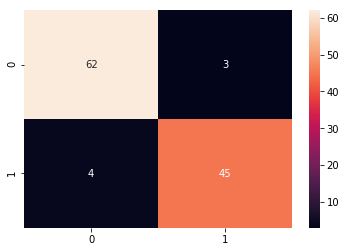

In [28]:
sns.heatmap(metrics.confusion_matrix(y_val_bool, y_val_pred), annot=True)

#### Test

In [29]:
y_test_pred = model.predict(x_test)

In [30]:
print('Test Accuracy: %.1f%%' % (metrics.accuracy_score(y_test_pred, y_test_bool) * 100))

Test Accuracy: 98.2%


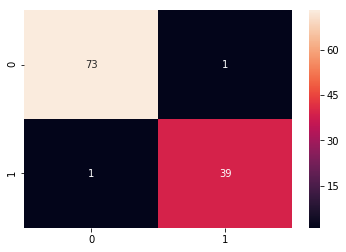

In [31]:
sns.heatmap(metrics.confusion_matrix(y_test_bool, y_test_pred), annot=True)

### SVM

#### Train Model

In [32]:
model = svm.SVC(C=10000)
model.fit(x_train_sup, y_train_sup_bool)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
y_train_sup_pred = model.predict(x_train_sup)

In [34]:
print('Training Accuracy: %.1f%%' % (metrics.accuracy_score(y_train_sup_pred, y_train_sup_bool) * 100))

Training Accuracy: 95.9%


#### Validation

In [35]:
y_val_pred = model.predict(x_val)

In [36]:
print('Validation Accuracy: %.1f%%' % (metrics.accuracy_score(y_val_pred, y_val_bool) * 100))

Validation Accuracy: 94.7%


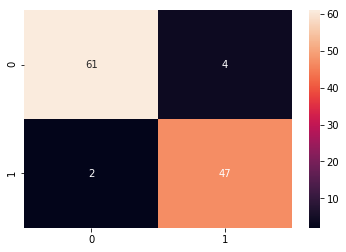

In [37]:
sns.heatmap(metrics.confusion_matrix(y_val_bool, y_val_pred), annot=True)

#### Test

In [38]:
y_test_pred = model.predict(x_test)

In [39]:
print('Test Accuracy: %.1f%%' % (metrics.accuracy_score(y_test_pred, y_test_bool) * 100))

Test Accuracy: 97.4%


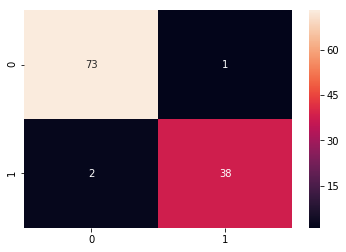

In [40]:
sns.heatmap(metrics.confusion_matrix(y_test_bool, y_test_pred), annot=True)

Done!